In [4]:
import pandas as pd

#imports the data and runs calculations on it
df = pd.read_csv('data/volume_pressure_data.csv')
dfmed = df.median()
dfmean = df.mean()
dfmode = df.mode()
dfstd = df.std()

#orginizes calculated result, lables it, and stores it as a data frame
data = {
    "name": ["Median", "Mean", "Mode", "Standard Deviation"], 
    "data": [dfmed, dfmean, dfmode, dfstd]
}
prints = pd.DataFrame(data)

#prints all collected data

print(prints)
print(df)



                 name                                               data
0              Median  Volume      24.0000
Pressure    58.8125
dtype:...
1                Mean  Volume      27.1200
Pressure    61.5075
dtype:...
2                Mode      Volume  Pressure
0       12   29.1250
1   ...
3  Standard Deviation  Volume      11.192706
Pressure    25.840546
dt...
    Volume  Pressure
0       48   29.1250
1       46   30.5625
2       44   31.9375
3       42   33.5000
4       40   35.3125
5       38   37.0000
6       36   39.3125
7       34   41.6250
8       32   44.1875
9       30   47.0625
10      28   50.3125
11      26   54.3125
12      24   58.8125
13      23   61.3125
14      22   64.0625
15      21   67.0625
16      20   70.6875
17      19   74.1250
18      18   77.8750
19      17   82.7500
20      16   87.8750
21      15   93.0625
22      14  100.4375
23      13  107.8125
24      12  117.5625


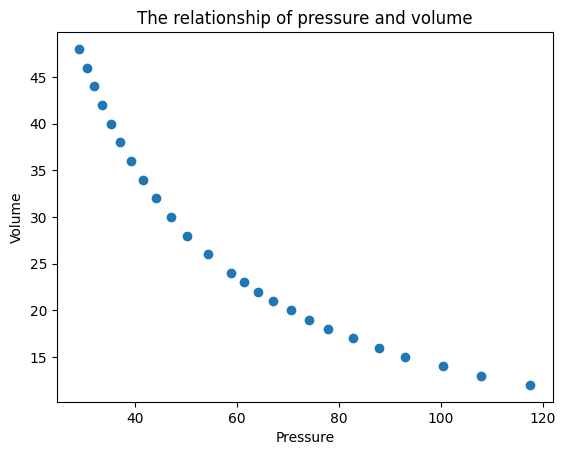

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Calls over data impoted in cell 1
x = df.Pressure
y = df.Volume

# Plots data and shows it as a graph
plt.plot(x, y, "o")
plt.xlabel('Pressure')
plt.ylabel('Volume')
plt.title('The relationship of pressure and volume')
plt.show()

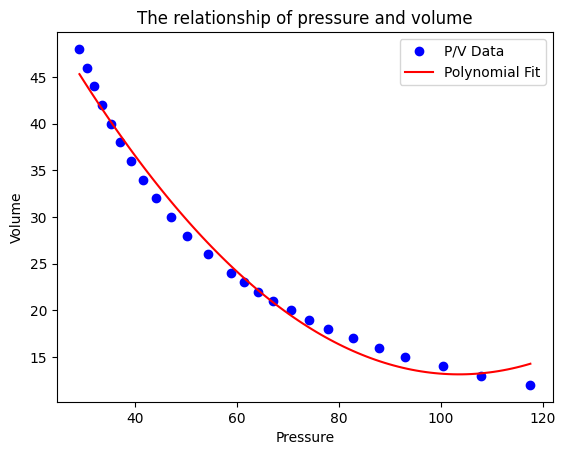

In [38]:
#Calculates the coefficents of the polynomial. The Python docs sugest a different method, but it works this way so I'm not touching it.
Fit = np.polyfit(x,y,2)
#produces a polynomial based on the coefficents
poly = np.poly1d(Fit)

#graphs the polynomial so that the y value is the polynomial at the given X value.
x_fit = np.linspace(min(x), max(x), 100)
y_fit = poly(x_fit)

#creates a plot of the polynomial and the original data.
plt.plot(x, y, linestyle = '',marker='o', color='blue', label='P/V Data')
plt.plot(x_fit, y_fit, linestyle = '-', color='red', label= 'Polynomial Fit')
plt.xlabel('Pressure')
plt.ylabel('Volume')
plt.legend()
plt.title('The relationship of pressure and volume')
plt.show()

          2
0.005805 x - 1.202 x + 75.39
1401.7671915053156


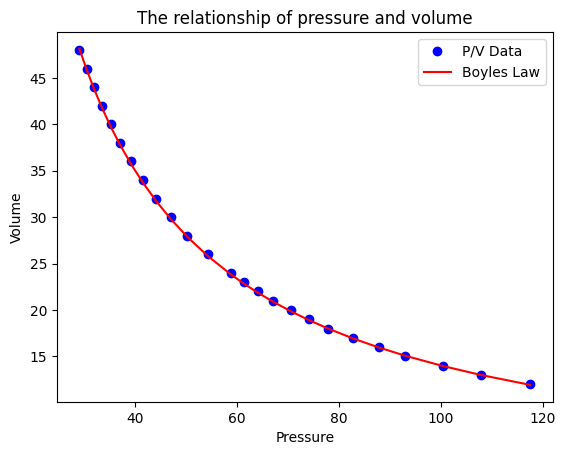

In [61]:

#Writes down the equation for the polynomial
print(poly)
#according to Boyle's law, y = some constant/x if the gas is ideal, to test this we can create an array of the input times the output of the polynomial 
Boyle_Array = x_fit * y_fit
#by pluging these numbers into boyle's law we should get an approximation of the constant
Boyle_Avg = np.mean(Boyle_Array)
print(Boyle_Avg)
#If the gas follows boyle's law the curve Y=1402/X should allign with the data I will produce a graph to test
y_Boyle = Boyle_Avg/x
plt.plot(x, y, linestyle = '',marker='o', color='blue', label='P/V Data')
plt.plot(x, y_Boyle, linestyle = '-', color='red', label= 'Boyles Law')
plt.xlabel('Pressure')
plt.ylabel('Volume')
plt.legend()
plt.title('The relationship of pressure and volume')
plt.show()
#Based on the graph the Gas does appear to follow Boyle's Law and the constant is ~1402

In [64]:
#This should calculate the Root Mean Squared Error
RMSE = np.sqrt(np.mean((poly(x) - Boyle_Avg/x) ** 2))
print(RMSE)
#Since RMSE is greater than 1 the polynomial is not a good predictor of the volume at a given pressure

1.3424684273933403
